In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Covid Dataset.csv to Covid Dataset (1).csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
covid_data=pd.read_csv('Covid Dataset.csv')
print(covid_data.columns)
print(covid_data)

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')
     Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0                  Yes   Yes       Yes         Yes          Yes     No   
1                  Yes   Yes       Yes         Yes           No    Yes   
2                  Yes   Yes       Yes         Yes          Yes    Yes   
3                  Yes   Yes       Yes          No           No    Yes   
4                  Yes   Yes       Yes         Yes          Yes     No   
...                ...   ...       ...         ...          ...    ...   
542

In [ ]:
yes_count=covid_data['COVID-19'].value_counts().get('Yes',0)
print("Number of Rows With Yes:", yes_count)
no_count=covid_data['COVID-19'].value_counts().get('No',0)
print("Number of Rows With No:", no_count)

Number of Rows With Yes: 4383
Number of Rows With No: 1051


In [ ]:
print(covid_data.info)

<bound method DataFrame.info of       Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0                     1   Yes       Yes         Yes          Yes     No   
1                     1   Yes       Yes         Yes           No    Yes   
2                     1   Yes       Yes         Yes          Yes    Yes   
3                     1   Yes       Yes          No           No    Yes   
4                     1   Yes       Yes         Yes          Yes     No   
...                 ...   ...       ...         ...          ...    ...   
5429                  1   Yes        No         Yes          Yes    Yes   
5430                  1   Yes       Yes          No          Yes    Yes   
5431                  1   Yes       Yes          No           No     No   
5432                  1   Yes       Yes          No          Yes     No   
5433                  1   Yes       Yes          No          Yes    Yes   

     Chronic Lung Disease Headache Heart Disease Diabetes  ... Fati

In [ ]:
print(covid_data.shape)

(5434, 21)


In [ ]:
print(covid_data.describe)

<bound method NDFrame.describe of       Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0                     1   Yes       Yes         Yes          Yes     No   
1                     1   Yes       Yes         Yes           No    Yes   
2                     1   Yes       Yes         Yes          Yes    Yes   
3                     1   Yes       Yes          No           No    Yes   
4                     1   Yes       Yes         Yes          Yes     No   
...                 ...   ...       ...         ...          ...    ...   
5429                  1   Yes        No         Yes          Yes    Yes   
5430                  1   Yes       Yes          No          Yes    Yes   
5431                  1   Yes       Yes          No           No     No   
5432                  1   Yes       Yes          No          Yes     No   
5433                  1   Yes       Yes          No          Yes    Yes   

     Chronic Lung Disease Headache Heart Disease Diabetes  ... Fa

In [ ]:
print(covid_data.describe().T)
print(covid_data.head())

                    count      mean       std  min  25%  50%  75%  max
Breathing Problem  5434.0  0.666176  0.471621  0.0  0.0  1.0  1.0  1.0
   Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0                  1   Yes       Yes         Yes          Yes     No   
1                  1   Yes       Yes         Yes           No    Yes   
2                  1   Yes       Yes         Yes          Yes    Yes   
3                  1   Yes       Yes          No           No    Yes   
4                  1   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...      

In [ ]:
missing_values=covid_data.isnull().sum()
print(missing_values)

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64


In [ ]:
percent_missing=covid_data.isnull().sum()*100/len(covid_data)
print(percent_missing)

Breathing Problem                          0.0
Fever                                      0.0
Dry Cough                                  0.0
Sore throat                                0.0
Running Nose                               0.0
Asthma                                     0.0
Chronic Lung Disease                       0.0
Headache                                   0.0
Heart Disease                              0.0
Diabetes                                   0.0
Hyper Tension                              0.0
Fatigue                                    0.0
Gastrointestinal                           0.0
Abroad travel                              0.0
Contact with COVID Patient                 0.0
Attended Large Gathering                   0.0
Visited Public Exposed Places              0.0
Family working in Public Exposed Places    0.0
Wearing Masks                              0.0
Sanitization from Market                   0.0
COVID-19                                   0.0
dtype: float6

In [ ]:
value ={
    'missing_values': missing_values,
    'percent_missing':percent_missing
}
missing_data=pd.DataFrame(value)
# print(missing_data)
missing_data

,missing_values,percent_missing
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


<Axes: >

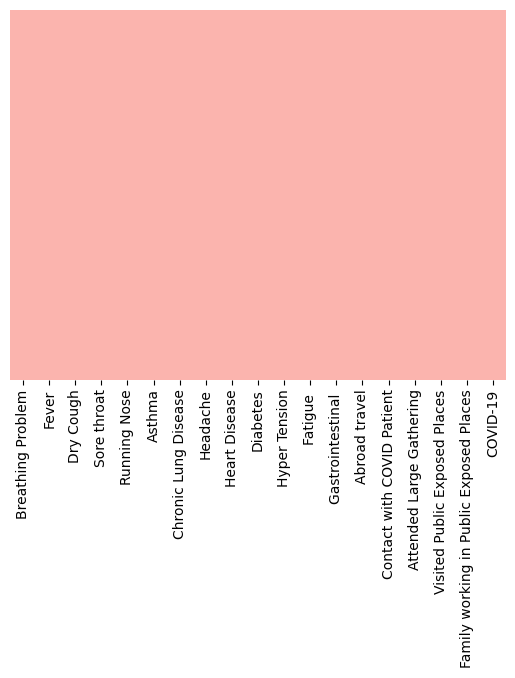

In [ ]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

<ipython-input-32-d52074fa3685>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='COVID-19',data=covid_data,palette="PuRd")


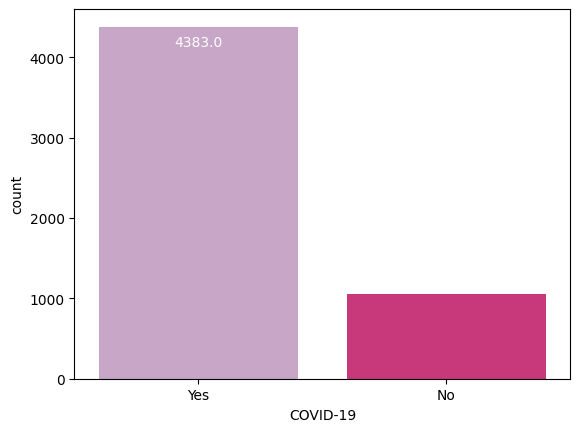

In [ ]:
ax=sns.countplot(x='COVID-19',data=covid_data,palette="PuRd")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()


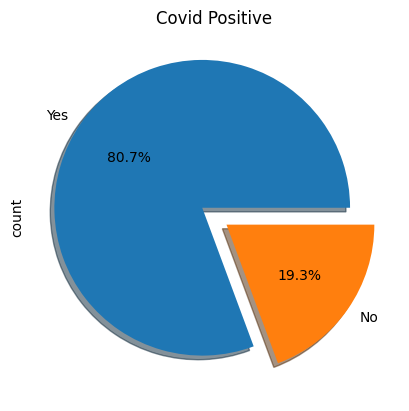

In [ ]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

<ipython-input-44-904d504afcfd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Breathing Problem',data=covid_data,palette="PuRd")


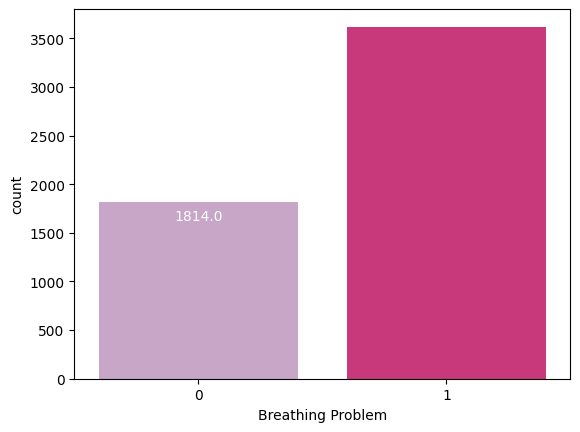

In [ ]:
ax=sns.countplot(x='Breathing Problem',data=covid_data,palette="PuRd")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

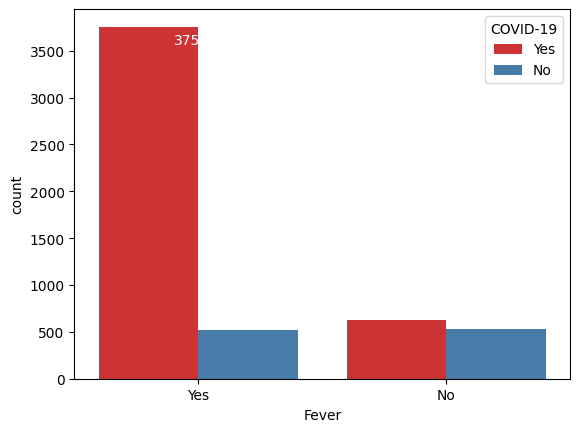

In [ ]:
ax=sns.countplot(x='Fever', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

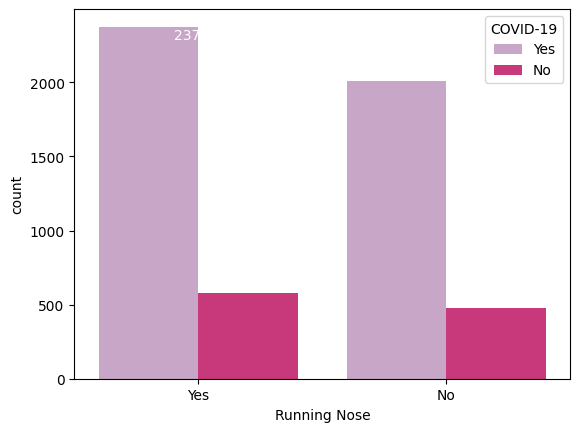

In [ ]:
ax=sns.countplot(x='Running Nose', hue='COVID-19',data=covid_data,palette="PuRd")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

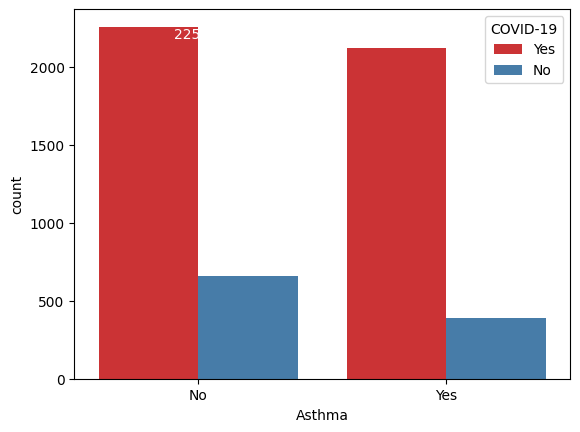

In [ ]:
ax=sns.countplot(x='Asthma', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

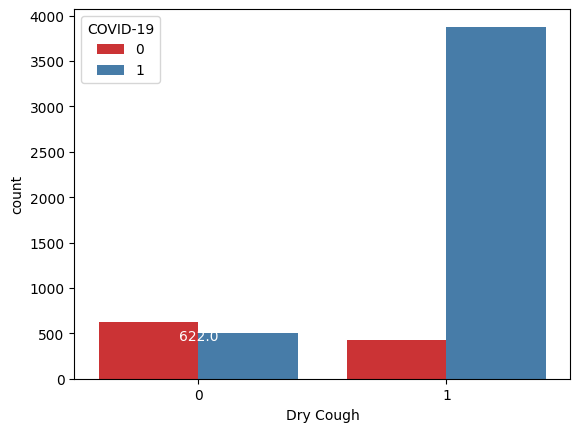

In [ ]:
ax=sns.countplot(x='Dry Cough', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

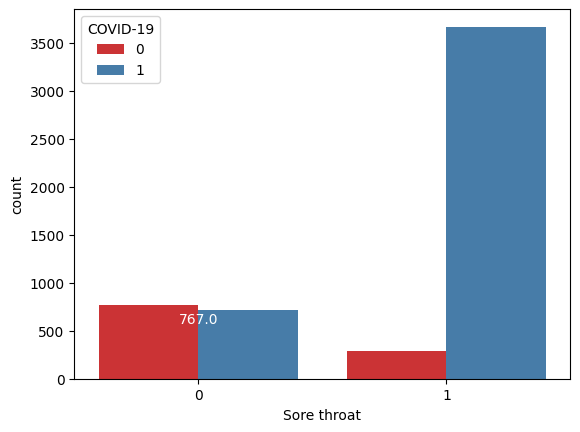

In [ ]:
ax=sns.countplot(x='Sore throat', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

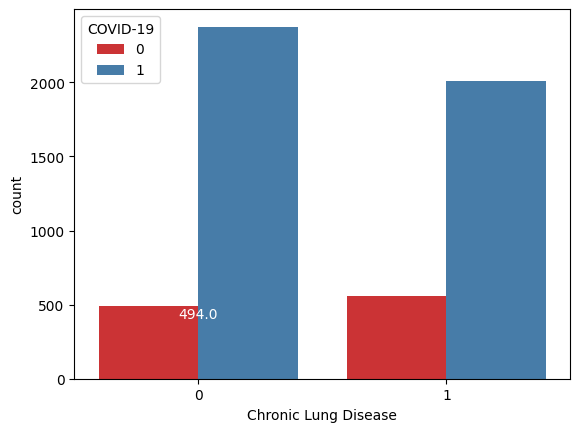

In [ ]:
ax=sns.countplot(x='Chronic Lung Disease', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

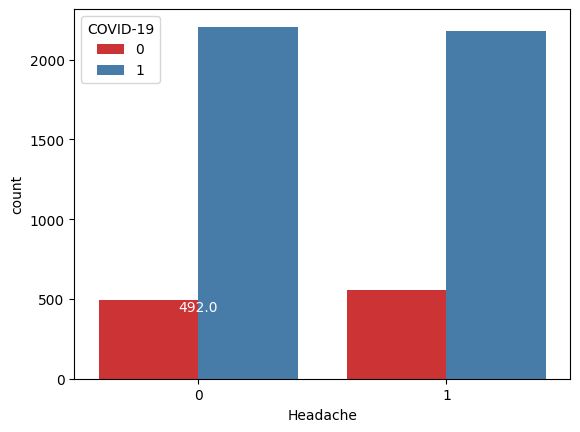

In [ ]:
ax=sns.countplot(x='Headache', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

In [ ]:
ax=sns.countplot(x='Heart Disease', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

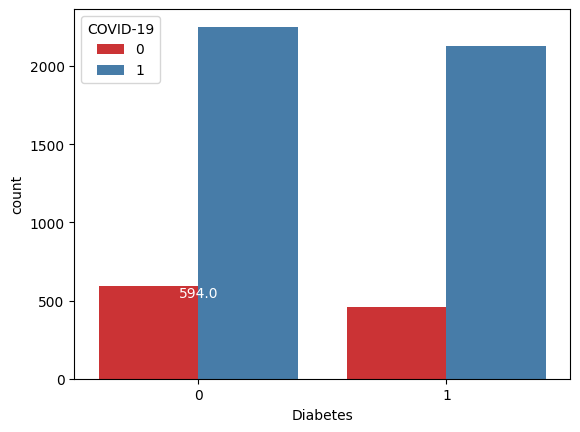

In [ ]:
ax=sns.countplot(x='Diabetes', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

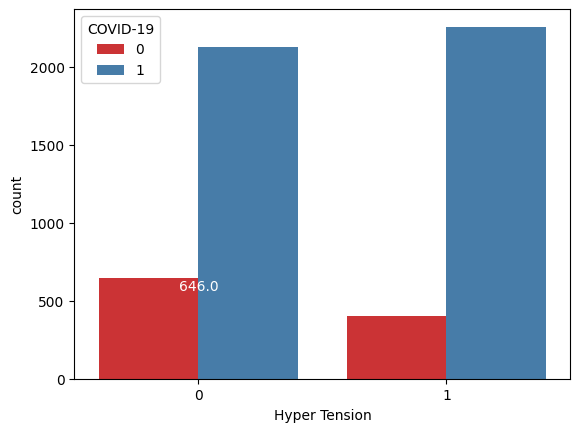

In [ ]:
ax=sns.countplot(x='Hyper Tension', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

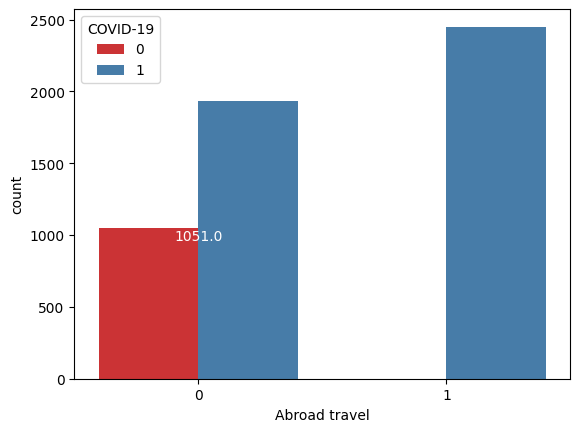

In [ ]:
ax=sns.countplot(x='Abroad travel', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

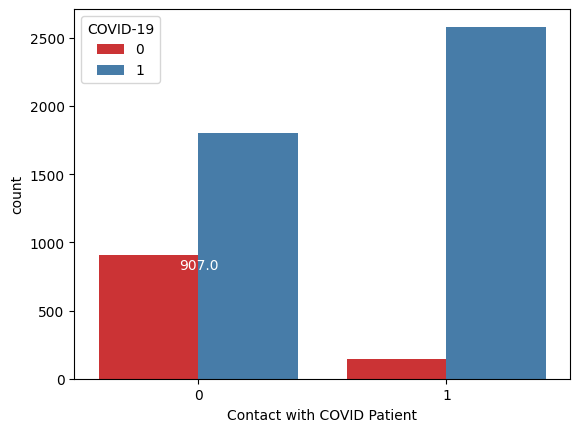

In [ ]:
ax=sns.countplot(x='Contact with COVID Patient', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

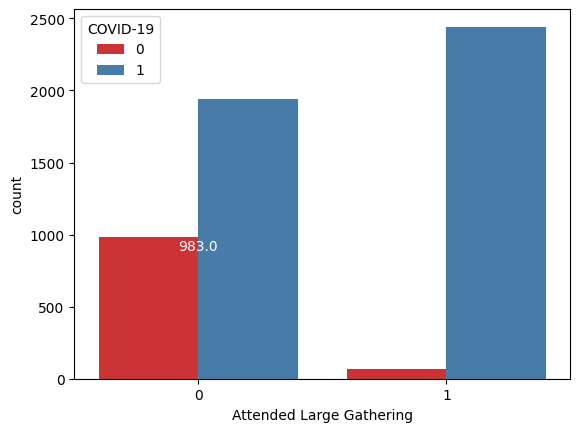

In [ ]:
ax=sns.countplot(x='Attended Large Gathering', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

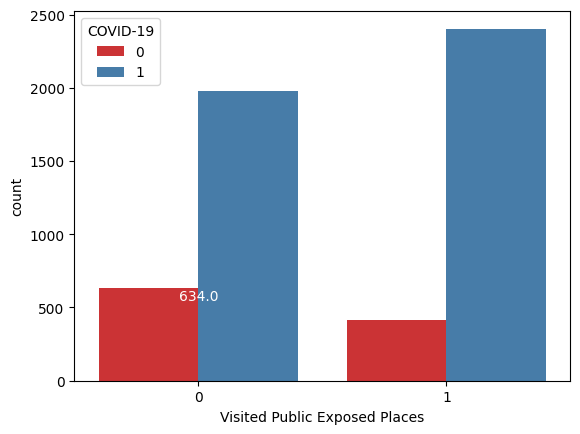

In [ ]:
ax=sns.countplot(x='Visited Public Exposed Places', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

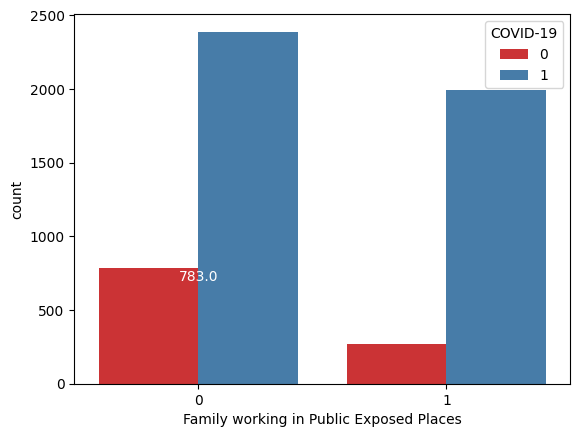

In [ ]:
ax=sns.countplot(x='Family working in Public Exposed Places', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

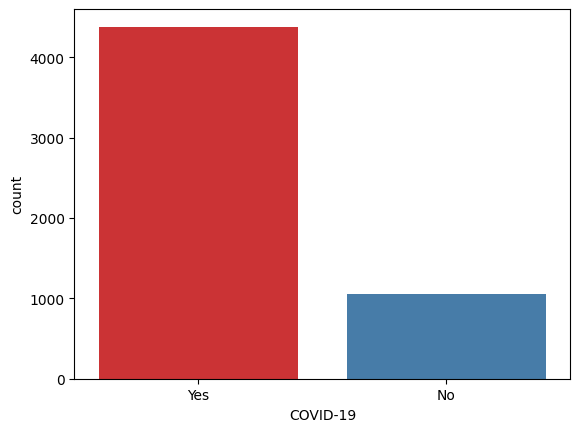

In [ ]:
x=sns.countplot(x='COVID-19', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

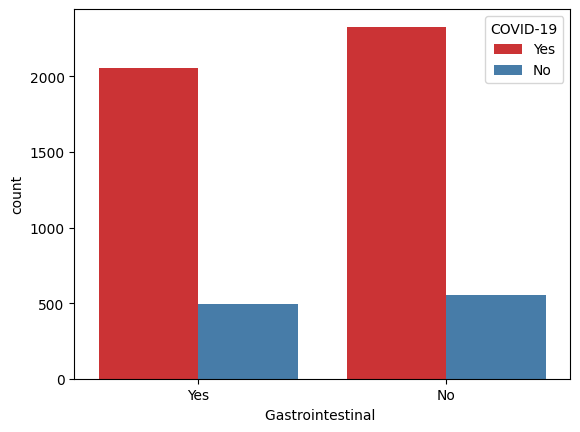

In [ ]:
x=sns.countplot(x='Gastrointestinal ', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

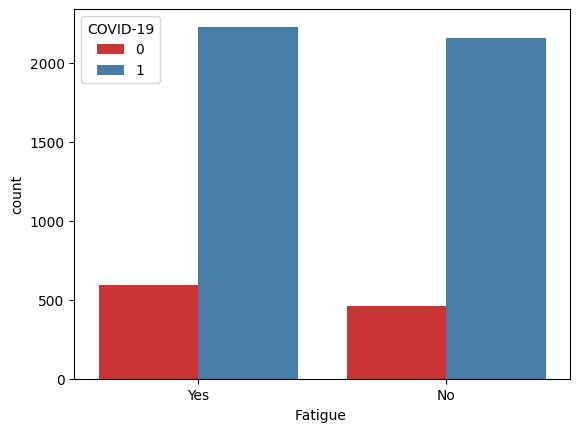

In [ ]:
x=sns.countplot(x='Fatigue ', hue='COVID-19',data=covid_data,palette="Set1")
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100),ha='center',va='top',color='white',size=10)
  plt.show()

In [ ]:
e=LabelEncoder()
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
# covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
# covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])


array([[<Axes: title={'center': 'Breathing Problem'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Dry Cough'}>,
        <Axes: title={'center': 'Sore throat'}>,
        <Axes: title={'center': 'Running Nose'}>],
       [<Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'Chronic Lung Disease'}>,
        <Axes: title={'center': 'Headache'}>,
        <Axes: title={'center': 'Heart Disease'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Hyper Tension'}>,
        <Axes: title={'center': 'Fatigue '}>,
        <Axes: title={'center': 'Gastrointestinal '}>,
        <Axes: title={'center': 'Abroad travel'}>,
        <Axes: title={'center': 'Contact with COVID Patient'}>],
       [<Axes: title={'center': 'Attended Large Gathering'}>,
        <Axes: title={'center': 'Visited Public Exposed Places'}>,
        <Axes: title={'center': 'Family working in Public Exposed Places'}>,
        <Axes: title={'center': 'We

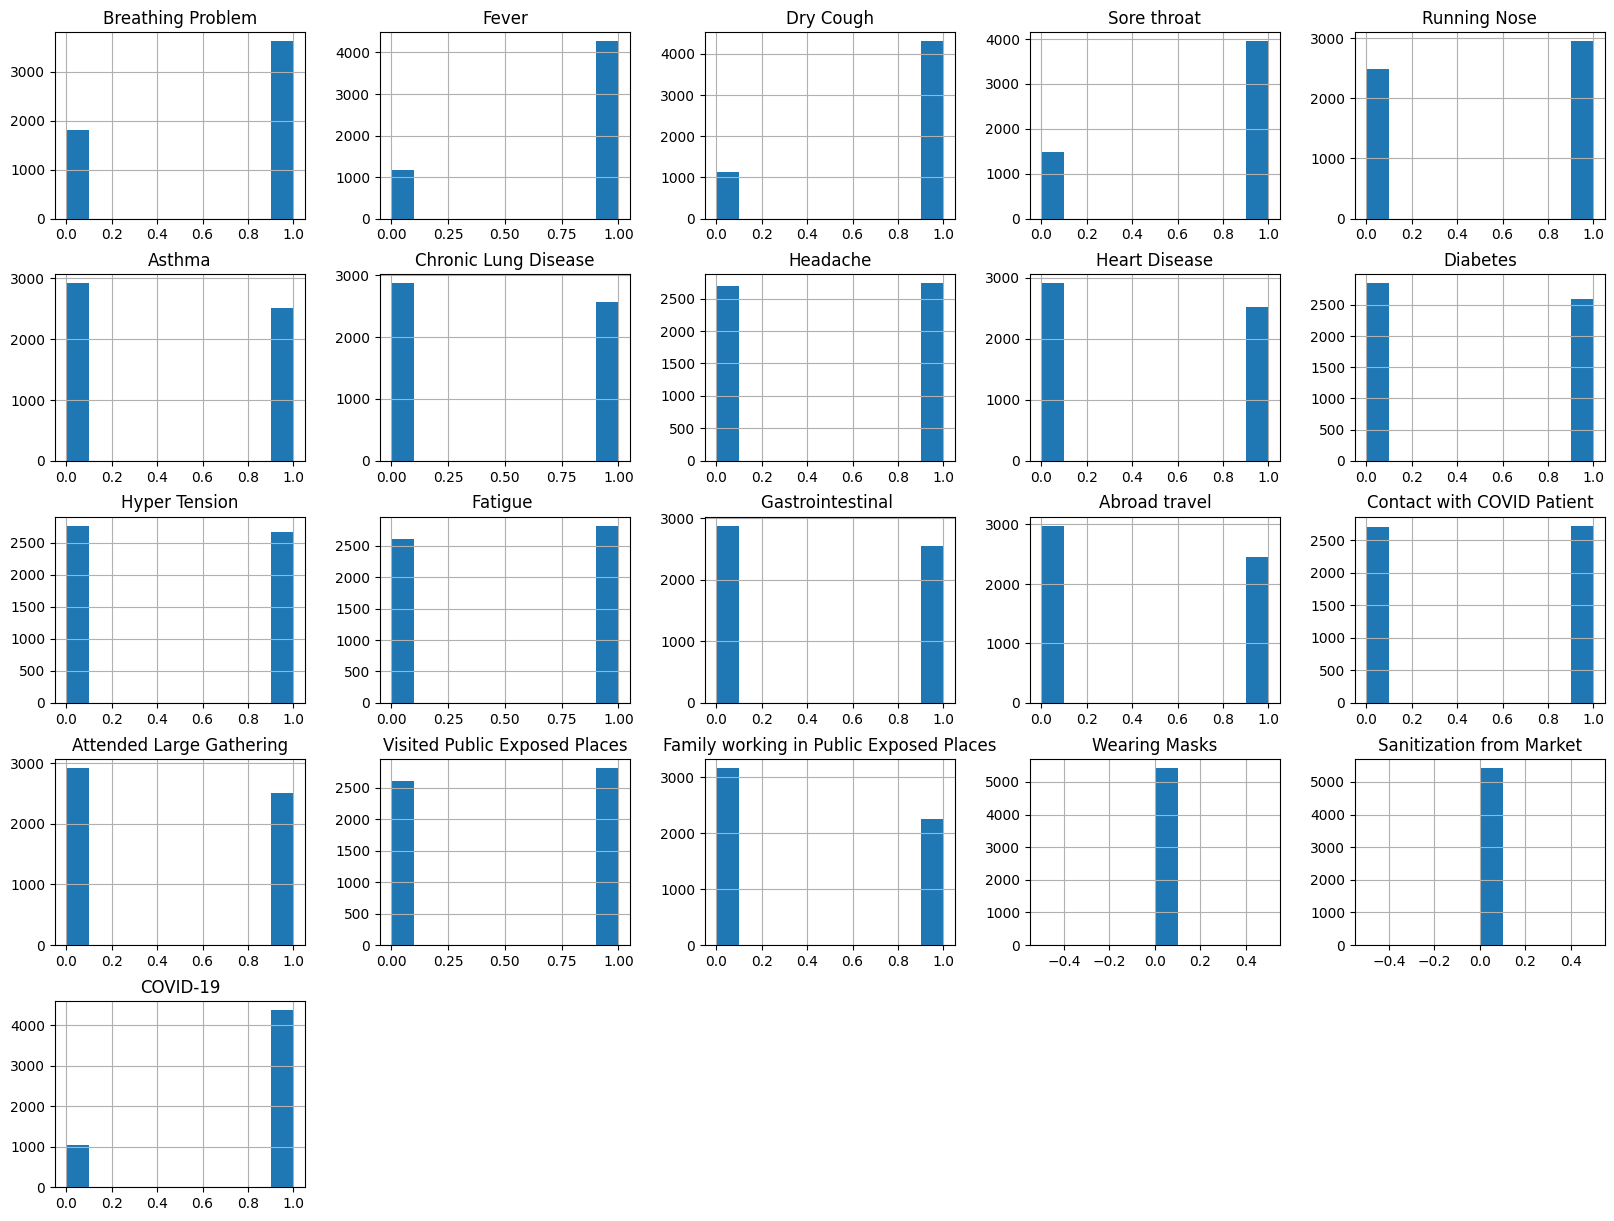

In [ ]:
covid_data.head()
covid_data.hist(figsize=(20,15))

<Figure size 2500x2000 with 0 Axes>

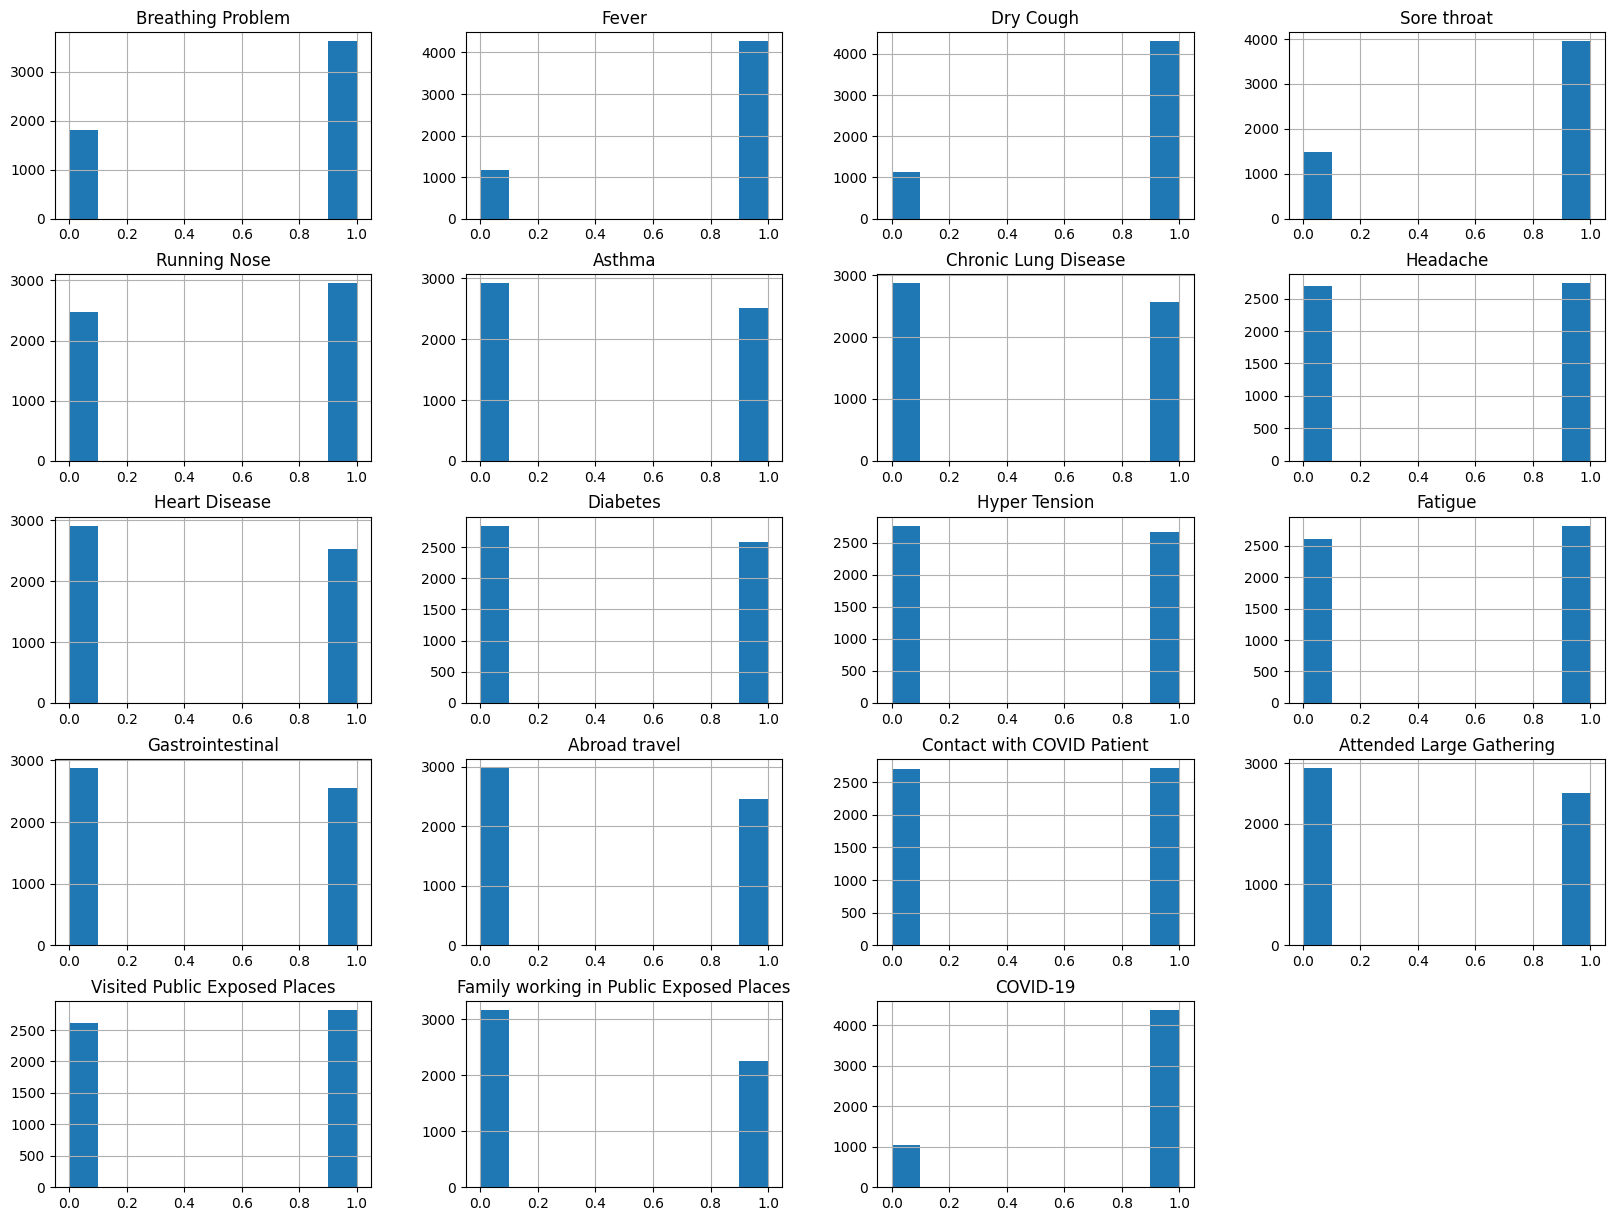

<Figure size 2500x2000 with 0 Axes>

In [ ]:
# Ensure all columns have no leading/trailing spaces
covid_data.columns = covid_data.columns.str.strip()

e=LabelEncoder()
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
# covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
# covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Gastrointestinal']=e.fit_transform(covid_data['Gastrointestinal']) # Corrected column name
covid_data['Fatigue']=e.fit_transform(covid_data['Fatigue']) # Corrected column name


covid_data.head()
covid_data.hist(figsize=(20,15))





RandomForestRegressor(random_state=42)

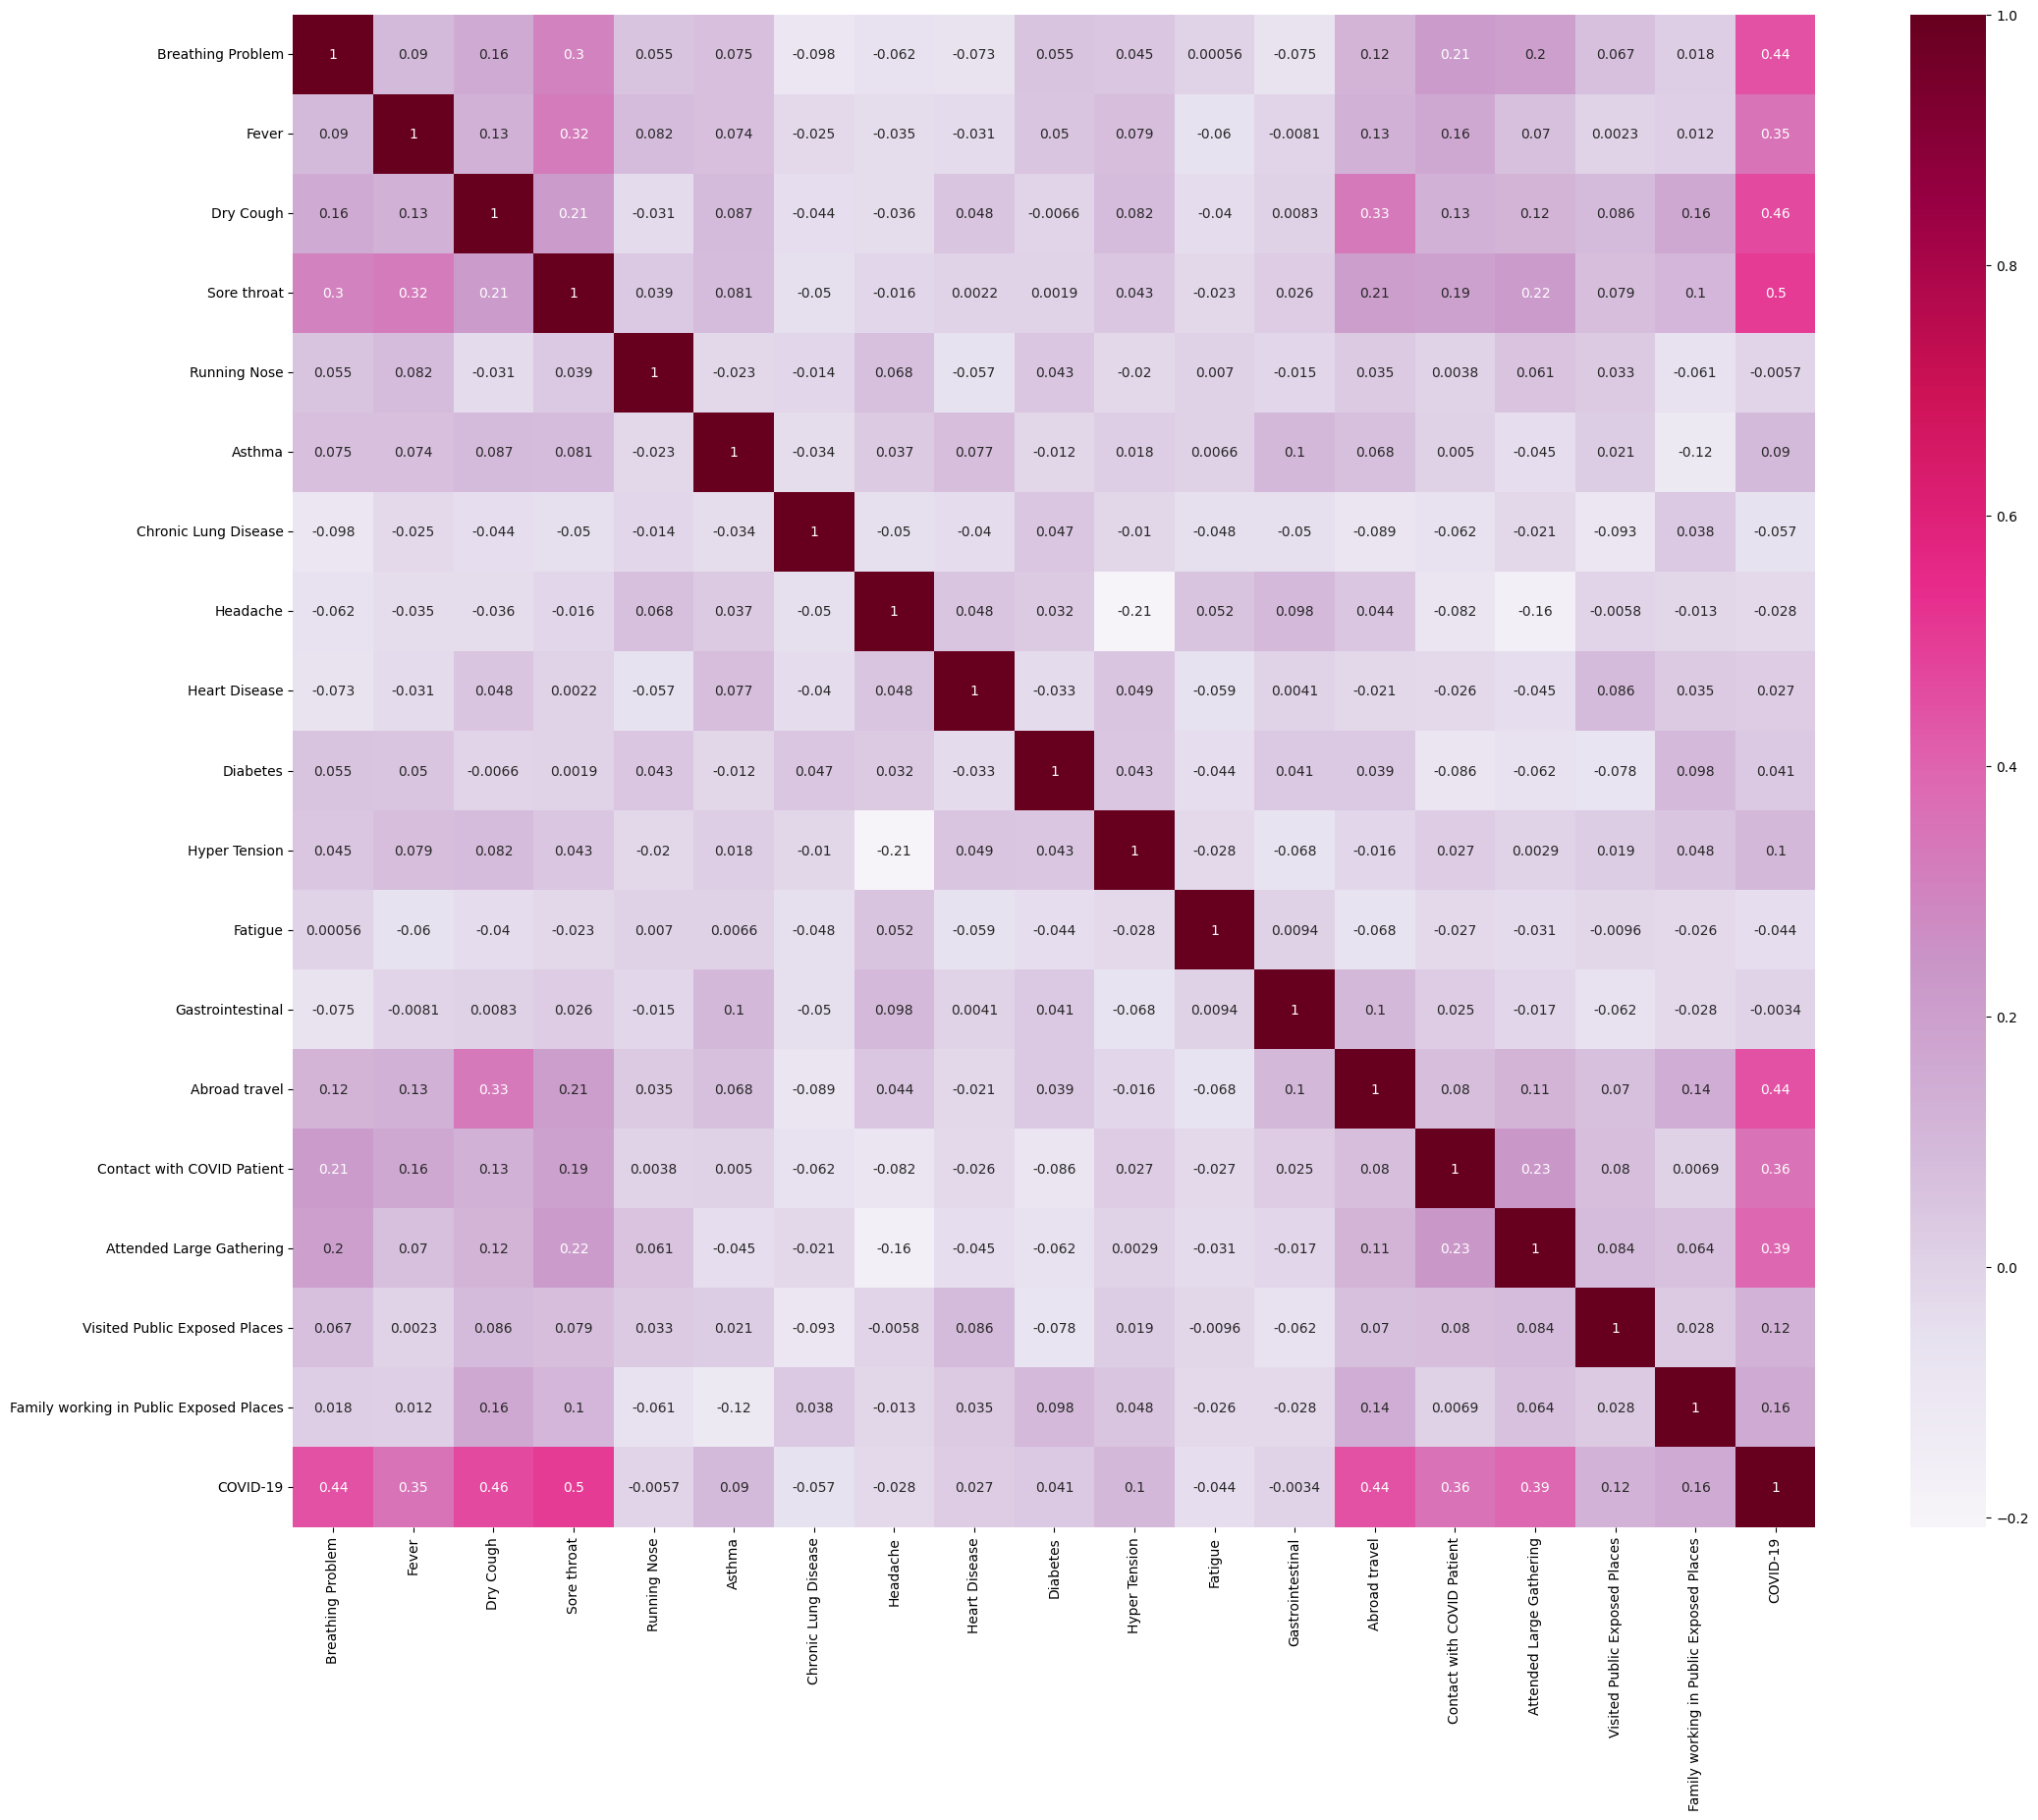

In [ ]:
# Select only numerical columns for correlation calculation
plt.figure(figsize=(25,20))
numerical_covid_data = covid_data.select_dtypes(include=np.number)
sns.heatmap(numerical_covid_data.corr(), annot=True, cmap="PuRd")

# Now that all relevant columns are numerical, proceed with splitting the data
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

In [ ]:
# Step 5: Predict cases and evaluate
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

df=pd.DataFrame({'Actual Cases': y_test, 'Predicted Cases': y_pred})
df

Mean Squared Error: 0.014862150356609613


,Actual Cases,Predicted Cases
977,1,1.000000
2309,1,1.000000
356,1,1.000000
2478,1,1.000000
4963,0,0.000000
...,...,...
177,1,0.615102
1815,1,1.000000
4811,0,0.000000
4565,0,0.194342
